### 2.2.2 区间量化（分箱）

In [1]:
import pandas as pd
import json

In [4]:
# 加载商户数据
biz_file = open('yelp_academic_dataset_business.json', encoding='gb18030',errors='ignore')
biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
biz_file.close()

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Occurrence')

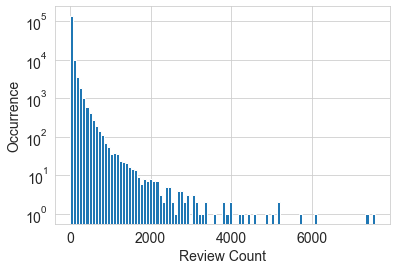

In [6]:
# 绘制点评数量直方图
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize = 14)
ax.set_xlabel('Review Count', fontsize = 14)
ax.set_ylabel('Occurrence', fontsize = 14)

#### 1. 固定宽度分箱

In [7]:
# 例子2-3 通过固定宽度分箱对计数值进行区间量化
import numpy as np
# 生成20个随机整数，均匀分布在0~99之间
small_counts = np.random.randint(0, 100, 20)
small_counts

array([27, 35, 77, 71, 29, 75, 18, 10, 48, 72, 95, 20, 11, 73, 60, 71, 78,
       15,  5,  7])

In [8]:
# 通过除法映射到间隔均匀的分箱中，每个分箱的取值范围都是0~9
np.floor_divide(small_counts, 10)

array([2, 3, 7, 7, 2, 7, 1, 1, 4, 7, 9, 2, 1, 7, 6, 7, 7, 1, 0, 0],
      dtype=int32)

In [9]:
# 横跨若干数量级的计数值数组
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897,
                                44, 28, 7971, 926, 122, 22222]
# 通过对数函数映射到指数宽度分箱
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

#### 2. 分位数分箱

In [10]:
 # 例2-4 计算Yelp商家点评数量的十分位数
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
deciles

0.1     6.0
0.2     7.0
0.3     9.0
0.4    11.0
0.5    15.0
0.6    20.0
0.7    30.0
0.8    48.0
0.9    97.0
Name: review_count, dtype: float64

Text(0, 0.5, 'Occurrence')

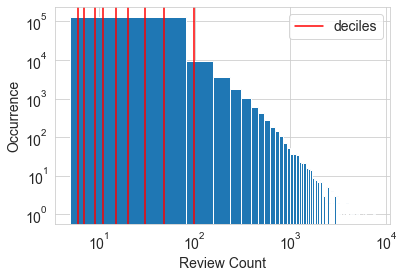

In [11]:
# 在直方图上画出十分位数
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize = 14)
ax.set_xlabel('Review Count', fontsize = 14)
ax.set_ylabel('Occurrence', fontsize = 14)

In [12]:
# 例2-5 通过分位数对计数值进行分箱
pd.qcut(large_counts, 4, labels=False)

array([1, 2, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 2, 1, 0, 3], dtype=int64)

In [14]:
# 计算实际的分位数值
large_counts_series = pd.Series(large_counts)
large_counts_series.quantile([0.25, 0.5, 0.75])

0.25     122.0
0.50     926.0
0.75    8286.0
dtype: float64

## 2.3 对数变换

In [20]:
y = np.arange(0.00001, 3, 0.01)
x = np.power(10, y)

Text(0, 0.5, 'log10(x)')

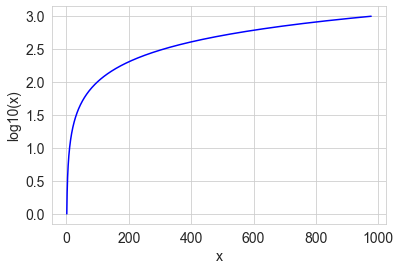

In [21]:
fig, ax = plt.subplots()
plt.plot(x, y, 'b')
ax.tick_params(labelsize=14)
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('log10(x)', fontsize = 14)

In [18]:
log_review_count = np.log10(biz_df['review_count'] + 1)

Text(0, 0.5, 'Occurrence')

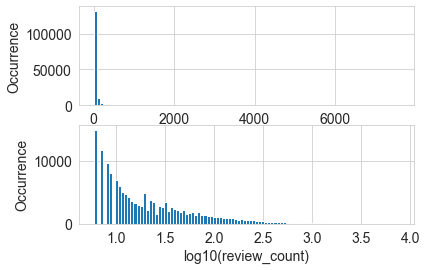

In [19]:
# 例2-6 对数变换前后的点评数量分布可视化
plt.figure()
ax = plt.subplot(2,1,1)
biz_df['review_count'].hist(ax=ax, bins=100)
ax.tick_params(labelsize = 14)
ax.set_xlabel('review_count', fontsize = 14)
ax.set_ylabel('Occurrence', fontsize = 14)

ax = plt.subplot(2,1,2)
log_review_count.hist(ax=ax, bins=100)
ax.tick_params(labelsize = 14)
ax.set_xlabel('log10(review_count)', fontsize = 14)
ax.set_ylabel('Occurrence', fontsize = 14)

### 2.3.1 对数变换实战

In [ ]:
### 2.3.1 对数变换实战